In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import svm
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("cleaned_data.csv")
df_t = pd.read_csv("cleane_test.csv")
df.head(5)

,Unnamed: 0,ID,Tag,Reputation,Answers,Username,Views,Upvotes,Tag_code
0,0,52664,a,3942.0,2.0,155623,7855.0,42.0,0
1,1,327662,a,26046.0,12.0,21781,55801.0,1175.0,0
2,2,468453,c,1358.0,4.0,56177,8067.0,60.0,1
3,3,96996,a,264.0,3.0,168793,27064.0,9.0,0
4,4,131465,c,4271.0,4.0,112223,13986.0,83.0,1


In [3]:
df_t.columns

Index(['Unnamed: 0', 'ID', 'Tag', 'Reputation', 'Answers', 'Username', 'Views',
       'Tag_code'],
      dtype='object')

In [4]:
rdf = df.drop(['Unnamed: 0', 'ID', 'Tag'],axis=1)
rtdf = df_t.drop(['Unnamed: 0', 'ID', 'Tag','Username'],axis=1)

In [5]:
rdf.columns

Index(['Reputation', 'Answers', 'Username', 'Views', 'Upvotes', 'Tag_code'], dtype='object')

In [6]:
X_train,X_test,y_train,y_test = train_test_split(rdf[['Reputation', 'Answers', 'Views','Tag_code']],rdf['Upvotes'],test_size=0.10, random_state=42)

In [8]:
meanSquare = []
for i in range(2,10):
    model = GradientBoostingRegressor(random_state=4,n_estimators=200,subsample=1.0,max_depth=i).fit(X_train,y_train)
    pred =  model.predict(X_test)
    meanSquare.append(metrics.mean_squared_error(y_true=y_test,y_pred=pred,squared=False))
    print(i,meanSquare[i-2])

    
#model2 = RandomForestRegressor(random_state=3)
#model3 = SVR()


2 1534.7853987011283
3 1544.6765889752871
4 1453.5014597833574
5 1524.1596840795007
6 1565.9370201217516
7 1587.278401803996
8 1523.3177834579178
9 1538.9037299256215


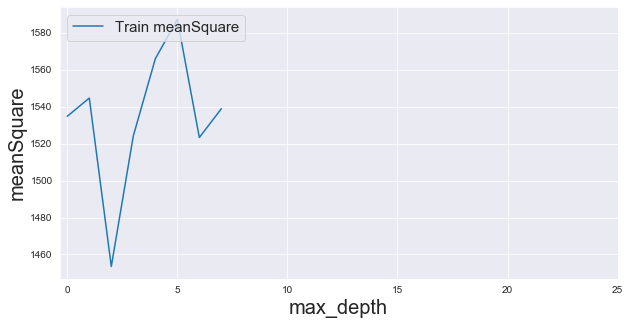

In [10]:
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
plt.plot(meanSquare,label="Train meanSquare")
plt.legend(loc="upper left",prop={'size':15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("meanSquare", size=20)
plt.show()

In [18]:
model = BaggingRegressor(GradientBoostingRegressor(),n_jobs=-1,max_samples=1.0)

In [19]:
model.fit(rdf[['Reputation', 'Answers', 'Views','Tag_code']],rdf['Upvotes'])

BaggingRegressor(base_estimator=GradientBoostingRegressor(alpha=0.9,
                                                          ccp_alpha=0.0,
                                                          criterion='friedman_mse',
                                                          init=None,
                                                          learning_rate=0.1,
                                                          loss='ls',
                                                          max_depth=3,
                                                          max_features=None,
                                                          max_leaf_nodes=None,
                                                          min_impurity_decrease=0.0,
                                                          min_impurity_split=None,
                                                          min_samples_leaf=1,
                                                          min_samples_split=2,
       

In [18]:
#model1.fit(rdf[['Reputation', 'Answers', 'Views','Tag_code']],rdf['Upvotes'])
#model2.fit(rdf[['Reputation', 'Answers', 'Views','Tag_code']],rdf['Upvotes'])


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=4, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [13]:
pred = model.predict(rtdf)
pred

array([229.32506742,  81.01095448,  41.69620877, ...,  68.1288412 ,
        18.90928381,  30.37043435])

In [14]:
result = pd.DataFrame()

In [15]:
result["ID"] = df_t["ID"]
result["Upvotes"] = pred

In [16]:
result.head()

,ID,Upvotes
0,366953,229.325067
1,71864,81.010954
2,141692,41.696209
3,316833,19.432401
4,440445,301.273727


In [17]:
result.to_csv("sub1.csv",index=False)

In [17]:
from sklearn.ensemble import VotingClassifier
rdf[['Reputation', 'Answers', 'Views','Tag_code']].to_numpy()

array([[3.9420e+03, 2.0000e+00, 7.8550e+03, 0.0000e+00],
       [2.6046e+04, 1.2000e+01, 5.5801e+04, 0.0000e+00],
       [1.3580e+03, 4.0000e+00, 8.0670e+03, 1.0000e+00],
       ...,
       [6.1780e+03, 2.0000e+00, 2.4530e+03, 1.0000e+00],
       [8.9000e+01, 2.0000e+00, 2.1070e+03, 4.0000e+00],
       [2.0010e+03, 4.0000e+00, 2.5540e+03, 4.0000e+00]])

In [82]:
from sklearn.ensemble import VotingRegressor

In [83]:
ereg = VotingRegressor(estimators=[('gb', model1), ('rf', model2)])

In [84]:
ereg.fit(X_train,y_train)

VotingRegressor(estimators=[('gb',
                             GradientBoostingRegressor(alpha=0.9,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                   